In [1]:
# import basic modules
import os, sys

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import C_to_U_classifier_plus_min.utils as utils
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# define input paths for CNN wavenet prediction on basecalling features

wt_dfCTaggr_iforest_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/wt.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"
ko_dfCTaggr_iforest_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/ko.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"

ref_filepath = "/lustre/bio_running/C_to_U_editing/refs/GRCm39.genome.fa"

ed_pos_filepath = "/lustre/bio_running/C_to_U_editing/merged_mm39.tsv"
ed_pos_columns_filepath = "/lustre/bio_running/C_to_U_editing/merged_mm39_columns.txt"

In [3]:
# open wt, ko and illumina ground truth table
with open(ed_pos_columns_filepath) as columns:
    ed_pos = pd.read_table(ed_pos_filepath, header=None)
    ed_pos.columns = [i.rstrip() for i in columns.readlines()]
ed_pos

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915683,chr1,4845460,C,1,290,35.40,"[0, 258, 0, 32]",CT,0.11,184,35.08,"[0, 184, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,chr1,4845471,C,1,290,35.45,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915851,chr1,4845628,C,1,142,35.19,"[0, 135, 0, 7]",CT,0.05,83,35.00,"[0, 83, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,chr1,4846161,C,1,183,35.79,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4967044,chr1,4896821,C,1,439,35.51,"[0, 404, 0, 35]",CT,0.08,325,35.56,"[0, 325, 0, 0]",-,0.0,UTR3,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,chrX,167346485,C,0,125,35.35,"[0, 119, 0, 6]",CT,0.05,86,35.72,"[0, 86, 0, 0]",-,0.0,UTR3,Prps2
683,chrX,166130959,chrX,167347963,C,0,70,35.71,"[0, 66, 0, 4]",CT,0.06,70,35.58,"[0, 70, 0, 0]",-,0.0,UTR3,Prps2
684,chrX,166131073,chrX,167348077,C,0,116,35.45,"[0, 110, 0, 6]",CT,0.05,128,35.77,"[0, 128, 0, 0]",-,0.0,UTR3,Prps2
685,chrX,166131296,chrX,167348300,C,0,133,35.46,"[0, 120, 0, 13]",CT,0.10,102,35.44,"[0, 102, 0, 0]",-,0.0,UTR3,Prps2


In [4]:
# iforest WT
wt_dfCTaggr_iforest = pd.read_table(wt_dfCTaggr_iforest_filepath)
# produce prediction
wt_dfCTaggr_iforest = wt_dfCTaggr_iforest.query("depth_stranded > 50")
wt_dfCTaggr_iforest = utils.predict_editing_custom_thrs(wt_dfCTaggr_iforest, 
                                                        "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1_cc2_merged.iforest.freq_thresholds.tsv",
                                                        ref_filepath,
                                                        0.02)
wt_dfCTaggr_iforest.columns = wt_dfCTaggr_iforest.columns[:3].tolist() + ["WT_T_native_iforest", "WT_T_corrected_iforest", 
                                                                          "WT_depth_stranded_iforest", "WT_Tfreq_native_iforest", 
                                                                          "WT_Tfreq_corrected_iforest", "WT_5mer_iforest", "WT_y_iforest"]
wt_dfCTaggr_iforest

100%|██████████| 382443/382443 [00:22<00:00, 16960.82it/s]


,region,position,strand,WT_T_native_iforest,WT_T_corrected_iforest,WT_depth_stranded_iforest,WT_Tfreq_native_iforest,WT_Tfreq_corrected_iforest,WT_5mer_iforest,WT_y_iforest
0,chr1,4846611,-,2,0,100,0.020000,0.0,GTCTG,0
1,chr1,4846619,-,1,0,101,0.009901,0.0,AGCTT,0
2,chr1,4846635,-,5,0,77,0.064935,0.0,TTCTT,0
3,chr1,4846643,-,3,0,103,0.029126,0.0,CACAT,0
4,chr1,4846645,-,3,0,103,0.029126,0.0,TGCAC,0
...,...,...,...,...,...,...,...,...,...,...
389965,chrY,90804626,+,2,0,66,0.030303,0.0,AGCGG,0
389966,chrY,90804632,+,1,0,67,0.014925,0.0,CGCCG,0
389967,chrY,90804649,+,1,0,58,0.017241,0.0,CTCTG,0
389968,chrY,90804680,+,2,0,60,0.033333,0.0,CTCCA,0


In [5]:
# iforest KO
ko_dfCTaggr_iforest = pd.read_table(ko_dfCTaggr_iforest_filepath)
# drop positions with coverage lower than 50
ko_dfCTaggr_iforest = ko_dfCTaggr_iforest.query("depth_stranded > 50")
ko_dfCTaggr_iforest = utils.predict_editing_custom_thrs(ko_dfCTaggr_iforest, 
                                                        "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1/cc1.iforest.freq_thresholds.tsv",
                                                        ref_filepath,
                                                        0.02)
ko_dfCTaggr_iforest.columns = ko_dfCTaggr_iforest.columns[:3].tolist() + ["KO_T_native_iforest", "KO_T_corrected_iforest", 
                                                                          "KO_depth_stranded_iforest", "KO_Tfreq_native_iforest", 
                                                                          "KO_Tfreq_corrected_iforest", "KO_5mer_iforest", "KO_y_iforest"]
ko_dfCTaggr_iforest

100%|██████████| 518188/518188 [00:31<00:00, 16611.65it/s]


,region,position,strand,KO_T_native_iforest,KO_T_corrected_iforest,KO_depth_stranded_iforest,KO_Tfreq_native_iforest,KO_Tfreq_corrected_iforest,KO_5mer_iforest,KO_y_iforest
0,chr1,4846611,-,2,0,113,0.017699,0.000,GTCTG,0
1,chr1,4846619,-,2,0,121,0.016529,0.000,AGCTT,0
2,chr1,4846635,-,7,0,98,0.071429,0.000,TTCTT,0
3,chr1,4846643,-,2,1,125,0.016000,0.008,CACAT,0
4,chr1,4846645,-,4,1,125,0.032000,0.008,TGCAC,0
...,...,...,...,...,...,...,...,...,...,...
527697,chrY,90833612,+,3,0,54,0.055556,0.000,CGCCA,0
527698,chrY,90833626,+,3,0,56,0.053571,0.000,GACTG,0
527699,chrY,90833629,+,6,0,55,0.109091,0.000,TGCGT,0
527700,chrY,90833633,+,2,0,56,0.035714,0.000,TACAG,0


In [6]:
# CNN WT
# loading aggregated data with 0.8 threshold
wt_dfCTaggr_cnn_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/wt.model_CNN_wt_PlusMin/df_CT_predicted_aggregated_08.tsv"
wt_dfCTaggr_cnn = pd.read_table(wt_dfCTaggr_cnn_filepath)
# produce prediction
wt_dfCTaggr_cnn = wt_dfCTaggr_cnn.query("depth_stranded > 50")
wt_dfCTaggr_cnn = utils.predict_editing_custom_thrs(wt_dfCTaggr_cnn, 
                                                    "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1_cc2_merged.CNN.freq_thresholds.tsv",
                                                    ref_filepath,
                                                    0.01)
wt_dfCTaggr_cnn.columns = wt_dfCTaggr_cnn.columns[:3].tolist() + ["WT_T_native_cnn", "WT_T_corrected_cnn", 
                                                                  "WT_depth_stranded_cnn", "WT_Tfreq_native_cnn", 
                                                                  "WT_Tfreq_corrected_cnn", "WT_5mer_cnn", "WT_y_cnn"]
wt_dfCTaggr_cnn

100%|██████████| 331762/331762 [00:19<00:00, 17212.12it/s]


,region,position,strand,WT_T_native_cnn,WT_T_corrected_cnn,WT_depth_stranded_cnn,WT_Tfreq_native_cnn,WT_Tfreq_corrected_cnn,WT_5mer_cnn,WT_y_cnn
0,chr1,4846611,-,1,0,100,0.010000,0.000000,GTCTG,0
1,chr1,4846619,-,1,0,101,0.009901,0.000000,AGCTT,0
2,chr1,4846635,-,4,3,77,0.051948,0.038961,TTCTT,0
3,chr1,4846643,-,3,0,103,0.029126,0.000000,CACAT,0
4,chr1,4846645,-,3,0,103,0.029126,0.000000,TGCAC,0
...,...,...,...,...,...,...,...,...,...,...
337784,chrY,90804626,+,2,0,66,0.030303,0.000000,AGCGG,0
337785,chrY,90804632,+,1,0,67,0.014925,0.000000,CGCCG,0
337786,chrY,90804649,+,1,0,58,0.017241,0.000000,CTCTG,0
337787,chrY,90804680,+,2,0,60,0.033333,0.000000,CTCCA,0


In [7]:
# CNN KO
# loading aggregated data with 0.8 threshold
ko_dfCTaggr_cnn_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/ko.model_CNN_ko_PlusMin/df_CT_predicted_aggregated_08.tsv"
ko_dfCTaggr_cnn = pd.read_table(ko_dfCTaggr_cnn_filepath)
# produce prediction
ko_dfCTaggr_cnn = ko_dfCTaggr_cnn.query("depth_stranded > 50")
ko_dfCTaggr_cnn = utils.predict_editing_custom_thrs(ko_dfCTaggr_cnn, 
                                                    "/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1_cc2_merged.CNN.freq_thresholds.tsv",
                                                    ref_filepath,
                                                    0.01)
ko_dfCTaggr_cnn.columns = ko_dfCTaggr_cnn.columns[:3].tolist() + ["KO_T_native_cnn", "KO_T_corrected_cnn", 
                                                                  "KO_depth_stranded_cnn", "KO_Tfreq_native_cnn", 
                                                                  "KO_Tfreq_corrected_cnn", "KO_5mer_cnn", "KO_y_cnn"]
ko_dfCTaggr_cnn

100%|██████████| 458321/458321 [00:26<00:00, 17142.53it/s]


,region,position,strand,KO_T_native_cnn,KO_T_corrected_cnn,KO_depth_stranded_cnn,KO_Tfreq_native_cnn,KO_Tfreq_corrected_cnn,KO_5mer_cnn,KO_y_cnn
0,chr1,4846619,-,2,0,121,0.016529,0.000000,AGCTT,0
1,chr1,4846635,-,7,3,98,0.071429,0.030612,TTCTT,0
2,chr1,4846643,-,1,0,125,0.008000,0.000000,CACAT,0
3,chr1,4846645,-,4,0,125,0.032000,0.000000,TGCAC,0
4,chr1,4846648,-,2,0,126,0.015873,0.000000,GGCTG,0
...,...,...,...,...,...,...,...,...,...,...
465902,chrY,90833612,+,3,0,54,0.055556,0.000000,CGCCA,0
465903,chrY,90833626,+,3,0,56,0.053571,0.000000,GACTG,0
465904,chrY,90833629,+,5,1,55,0.090909,0.018182,TGCGT,1
465905,chrY,90833633,+,2,0,56,0.035714,0.000000,TACAG,0


In [8]:
# create ensemble prediciton set (only sites called as edited by both models iforest and CNN) WT
wt_ensemble = pd.merge(wt_dfCTaggr_iforest, wt_dfCTaggr_cnn, on=["region", "position", "strand"], how="inner")
# make ensemble prediction
wt_ensemble["WT_y_ensemble"] = [1 if (iforest == 1)and(cnn == 1) else 0 for iforest,cnn in zip(wt_ensemble["WT_y_iforest"].values, wt_ensemble["WT_y_cnn"].values)]
wt_ensemble

,region,position,strand,WT_T_native_iforest,WT_T_corrected_iforest,WT_depth_stranded_iforest,WT_Tfreq_native_iforest,WT_Tfreq_corrected_iforest,WT_5mer_iforest,WT_y_iforest,WT_T_native_cnn,WT_T_corrected_cnn,WT_depth_stranded_cnn,WT_Tfreq_native_cnn,WT_Tfreq_corrected_cnn,WT_5mer_cnn,WT_y_cnn,WT_y_ensemble
0,chr1,4846611,-,2,0,100,0.020000,0.0,GTCTG,0,1,0,100,0.010000,0.000000,GTCTG,0,0
1,chr1,4846619,-,1,0,101,0.009901,0.0,AGCTT,0,1,0,101,0.009901,0.000000,AGCTT,0,0
2,chr1,4846635,-,5,0,77,0.064935,0.0,TTCTT,0,4,3,77,0.051948,0.038961,TTCTT,0,0
3,chr1,4846643,-,3,0,103,0.029126,0.0,CACAT,0,3,0,103,0.029126,0.000000,CACAT,0,0
4,chr1,4846645,-,3,0,103,0.029126,0.0,TGCAC,0,3,0,103,0.029126,0.000000,TGCAC,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331757,chrY,90804626,+,2,0,66,0.030303,0.0,AGCGG,0,2,0,66,0.030303,0.000000,AGCGG,0,0
331758,chrY,90804632,+,1,0,67,0.014925,0.0,CGCCG,0,1,0,67,0.014925,0.000000,CGCCG,0,0
331759,chrY,90804649,+,1,0,58,0.017241,0.0,CTCTG,0,1,0,58,0.017241,0.000000,CTCTG,0,0
331760,chrY,90804680,+,2,0,60,0.033333,0.0,CTCCA,0,2,0,60,0.033333,0.000000,CTCCA,0,0


In [9]:
# create ensemble prediciton set (only sites called as edited by both models iforest and CNN) KO
ko_ensemble = pd.merge(ko_dfCTaggr_iforest, ko_dfCTaggr_cnn, on=["region", "position", "strand"], how="inner")
# make ensemble prediction
ko_ensemble["KO_y_ensemble"] = [1 if (iforest == 1)and(cnn == 1) else 0 for iforest,cnn in zip(ko_ensemble["KO_y_iforest"].values, ko_ensemble["KO_y_cnn"].values)]
ko_ensemble

,region,position,strand,KO_T_native_iforest,KO_T_corrected_iforest,KO_depth_stranded_iforest,KO_Tfreq_native_iforest,KO_Tfreq_corrected_iforest,KO_5mer_iforest,KO_y_iforest,KO_T_native_cnn,KO_T_corrected_cnn,KO_depth_stranded_cnn,KO_Tfreq_native_cnn,KO_Tfreq_corrected_cnn,KO_5mer_cnn,KO_y_cnn,KO_y_ensemble
0,chr1,4846619,-,2,0,121,0.016529,0.000,AGCTT,0,2,0,121,0.016529,0.000000,AGCTT,0,0
1,chr1,4846635,-,7,0,98,0.071429,0.000,TTCTT,0,7,3,98,0.071429,0.030612,TTCTT,0,0
2,chr1,4846643,-,2,1,125,0.016000,0.008,CACAT,0,1,0,125,0.008000,0.000000,CACAT,0,0
3,chr1,4846645,-,4,1,125,0.032000,0.008,TGCAC,0,4,0,125,0.032000,0.000000,TGCAC,0,0
4,chr1,4846648,-,2,0,126,0.015873,0.000,GGCTG,0,2,0,126,0.015873,0.000000,GGCTG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458316,chrY,90833612,+,3,0,54,0.055556,0.000,CGCCA,0,3,0,54,0.055556,0.000000,CGCCA,0,0
458317,chrY,90833626,+,3,0,56,0.053571,0.000,GACTG,0,3,0,56,0.053571,0.000000,GACTG,0,0
458318,chrY,90833629,+,6,0,55,0.109091,0.000,TGCGT,0,5,1,55,0.090909,0.018182,TGCGT,1,0
458319,chrY,90833633,+,2,0,56,0.035714,0.000,TACAG,0,2,0,56,0.035714,0.000000,TACAG,0,0


In [10]:
# focusing only on edited position basing on illumina ground truth for wt
wt_genome_space = pd.merge(ed_pos.drop("strand", axis =1), wt_ensemble, how="left", left_on=["contig_mm39", "pos_mm39"], right_on=["region", "position"])
wt_genome_space = wt_genome_space.drop(["contig_mm10", "contig_mm10", "pos_mm10", "ref_base", "cov_WT", "MeanQual_WT", "Subs_WT", "cov_KO", "MeanQual_KO", "Subs_KO"], axis=1)
wt_genome_space

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,...,WT_5mer_iforest,WT_y_iforest,WT_T_native_cnn,WT_T_corrected_cnn,WT_depth_stranded_cnn,WT_Tfreq_native_cnn,WT_Tfreq_corrected_cnn,WT_5mer_cnn,WT_y_cnn,WT_y_ensemble
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,CACAT,0.0,7.0,0.0,54.0,0.129630,0.000000,CACAT,0.0,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,TACTA,1.0,7.0,2.0,51.0,0.137255,0.039216,TACTA,1.0,1.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,TACTG,1.0,10.0,1.0,65.0,0.153846,0.015385,TACTG,0.0,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,AACTA,1.0,9.0,1.0,106.0,0.084906,0.009434,AACTA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# focusing only on edited position basing on illumina ground truth for ko
ko_genome_space = pd.merge(ed_pos.drop("strand", axis =1), ko_ensemble, how="left", left_on=["contig_mm39", "pos_mm39"], right_on=["region", "position"])
ko_genome_space = ko_genome_space.drop(["contig_mm10", "contig_mm10", "pos_mm10", "ref_base", "cov_WT", "MeanQual_WT", "Subs_WT", "cov_KO", "MeanQual_KO", "Subs_KO"], axis=1)
ko_genome_space

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]",SubsFreq_WT,"BaseCount_KO[A,C,G,T]",SubsFreq_KO,PositionAnnotation,gene_name,region,position,...,KO_5mer_iforest,KO_y_iforest,KO_T_native_cnn,KO_T_corrected_cnn,KO_depth_stranded_cnn,KO_Tfreq_native_cnn,KO_Tfreq_corrected_cnn,KO_5mer_cnn,KO_y_cnn,KO_y_ensemble
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,CACAT,0.0,3.0,0.0,81.0,0.037037,0.0,CACAT,0.0,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,TACTA,0.0,7.0,0.0,83.0,0.084337,0.0,TACTA,0.0,0.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,TACTG,0.0,4.0,0.0,99.0,0.040404,0.0,TACTG,0.0,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,AACTA,0.0,4.0,0.0,123.0,0.032520,0.0,AACTA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wt_vs_ko = pd.merge(wt_genome_space, ko_genome_space, how="inner", on=["contig_mm39", "pos_mm39"])
wt_vs_ko

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]_x",SubsFreq_WT_x,"BaseCount_KO[A,C,G,T]_x",SubsFreq_KO_x,PositionAnnotation_x,gene_name_x,region_x,position_x,...,KO_5mer_iforest,KO_y_iforest,KO_T_native_cnn,KO_T_corrected_cnn,KO_depth_stranded_cnn,KO_Tfreq_native_cnn,KO_Tfreq_corrected_cnn,KO_5mer_cnn,KO_y_cnn,KO_y_ensemble
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,CACAT,0.0,3.0,0.0,81.0,0.037037,0.0,CACAT,0.0,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,TACTA,0.0,7.0,0.0,83.0,0.084337,0.0,TACTA,0.0,0.0
2,chr1,4915851,"[0, 135, 0, 7]",0.05,"[0, 83, 0, 0]",0.0,UTR3,Lypla1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,TACTG,0.0,4.0,0.0,99.0,0.040404,0.0,TACTG,0.0,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,AACTA,0.0,4.0,0.0,123.0,0.032520,0.0,AACTA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,"[0, 119, 0, 6]",0.05,"[0, 86, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,chrX,166130959,"[0, 66, 0, 4]",0.06,"[0, 70, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,chrX,166131073,"[0, 110, 0, 6]",0.05,"[0, 128, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,chrX,166131296,"[0, 120, 0, 13]",0.10,"[0, 102, 0, 0]",0.0,UTR3,Prps2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# drop sites with nan (sites not retrieved in nanopore runs) and save to disk
wt_vs_ko_dropped = wt_vs_ko.dropna()
wt_vs_ko_dropped

,contig_mm39,pos_mm39,"BaseCount_WT[A,C,G,T]_x",SubsFreq_WT_x,"BaseCount_KO[A,C,G,T]_x",SubsFreq_KO_x,PositionAnnotation_x,gene_name_x,region_x,position_x,...,KO_5mer_iforest,KO_y_iforest,KO_T_native_cnn,KO_T_corrected_cnn,KO_depth_stranded_cnn,KO_Tfreq_native_cnn,KO_Tfreq_corrected_cnn,KO_5mer_cnn,KO_y_cnn,KO_y_ensemble
0,chr1,4915683,"[0, 258, 0, 32]",0.11,"[0, 184, 0, 0]",0.0,UTR3,Lypla1,chr1,4915683.0,...,CACAT,0.0,3.0,0.0,81.0,0.037037,0.0,CACAT,0.0,0.0
1,chr1,4915694,"[0, 258, 0, 32]",0.11,"[0, 183, 0, 0]",0.0,UTR3,Lypla1,chr1,4915694.0,...,TACTA,0.0,7.0,0.0,83.0,0.084337,0.0,TACTA,0.0,0.0
3,chr1,4916384,"[0, 164, 0, 19]",0.10,"[0, 134, 0, 0]",0.0,UTR3,Lypla1,chr1,4916384.0,...,TACTG,0.0,4.0,0.0,99.0,0.040404,0.0,TACTG,0.0,0.0
4,chr1,4967044,"[0, 404, 0, 35]",0.08,"[0, 325, 0, 0]",0.0,UTR3,Tcea1,chr1,4967044.0,...,AACTA,0.0,4.0,0.0,123.0,0.032520,0.0,AACTA,0.0,0.0
5,chr1,13636029,"[0, 526, 0, 50]",0.09,"[0, 337, 0, 0]",0.0,UTR3,Tram1,chr1,13636029.0,...,TACTA,0.0,1.0,0.0,123.0,0.008130,0.0,TACTA,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,chrX,108204244,"[0, 363, 0, 25]",0.06,"[0, 299, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204244.0,...,TACTG,0.0,5.0,0.0,98.0,0.051020,0.0,TACTG,0.0,0.0
658,chrX,108204313,"[0, 487, 0, 87]",0.15,"[0, 394, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204313.0,...,GACAT,0.0,1.0,0.0,100.0,0.010000,0.0,GACAT,0.0,0.0
659,chrX,108204658,"[0, 367, 0, 50]",0.12,"[0, 295, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204658.0,...,AACGA,0.0,2.0,0.0,107.0,0.018692,0.0,AACGA,0.0,0.0
660,chrX,108204953,"[0, 623, 0, 32]",0.05,"[0, 462, 0, 0]",0.0,UTR3,Sh3bgrl,chrX,108204953.0,...,TACTT,0.0,3.0,0.0,111.0,0.027027,0.0,TACTT,0.0,0.0


In [16]:
wt_vs_ko_dropped.WT_y_ensemble.value_counts()

0.0    121
1.0     53
Name: WT_y_ensemble, dtype: int64

In [17]:
wt_vs_ko_dropped.KO_y_ensemble.value_counts()

0.0    171
1.0      3
Name: KO_y_ensemble, dtype: int64

In [23]:
# create vectors of predicted classes for illumina ground truth and ensemble model prediction
y_illumina = [1 for i in range(wt_vs_ko_dropped.shape[0])] + [0 for i in range(wt_vs_ko_dropped.shape[0])]
y_hat_ensemble = wt_vs_ko_dropped.WT_y_ensemble.tolist() + wt_vs_ko_dropped.KO_y_ensemble.tolist()

# calculate metrics
print("1 editing, 0 no-editing\n")
print(f"\nMetrics Nanopore Editing detection with correction by iForest (custom thresholds)")
print(classification_report(y_illumina, y_hat_ensemble))

1 editing, 0 no-editing


Metrics Nanopore Editing detection with correction by iForest (custom thresholds)
              precision    recall  f1-score   support

           0       0.59      0.98      0.73       174
           1       0.95      0.30      0.46       174

    accuracy                           0.64       348
   macro avg       0.77      0.64      0.60       348
weighted avg       0.77      0.64      0.60       348



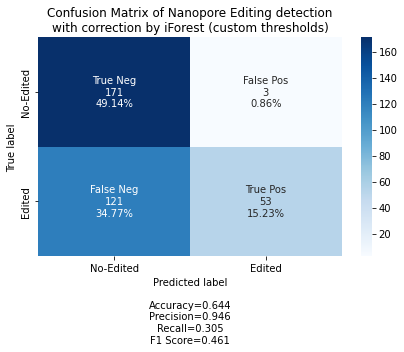

In [25]:
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
categories = ["No-Edited", "Edited"]

# confusion matrices plots
utils.make_confusion_matrix(confusion_matrix(y_illumina, y_hat_ensemble), 
                      group_names=labels,
                      categories=categories,
                      title = f"Confusion Matrix of Nanopore Editing detection\nwith correction by iForest (custom thresholds)",
                      figsize=(6,5),
                      path="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/wt_ko/ConfMatrix_wt_vs_ko_EnsembleCorrection.tiff")